# Astronomy 19 Final Project Demo

Author: April Ewers

Follows and attempts to make sense of: https://sep.readthedocs.io/en/stable/tutorial.html

This cell simply imports the required libraries for the later operations.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import astropy.io.fits
import sep

The following cell gets the image data we're going to work with from the extra HDU metadata.

In [6]:
data = astropy.io.fits.getdata('./data/imageDemo.fits')

ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]


The following cell takes the image data and processes it into an image using a greyscale colormap to show intensity of light hitting the sensor.

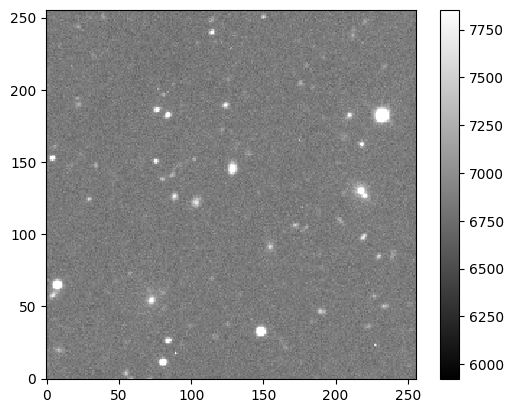

In [7]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();


The following removes the background so that the sources can be evaluated. It also shows the background as an image so we can see what is being subtracted out.

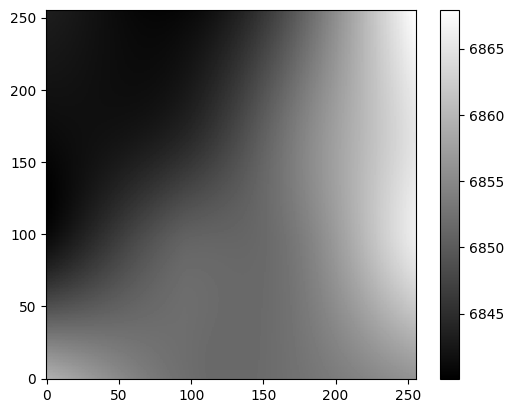

In [10]:
bkg = sep.Background(data)
bkg_image = bkg.back()

plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

We also want to remove background noise, so we will process that and display it in the same manner.

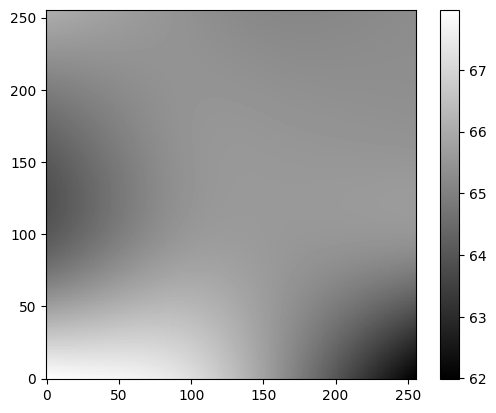

In [11]:
bkg_rms = bkg.rms()

plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

We will then perform the actual removal of the background and save that as the data we will work with going forward.

In [13]:
data_sub = data - bkg

Now that the data is processed, we can use the extraction function to recognize sources within our image with an accomodation for the noise we detected.

In [14]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

For each object, we will create an ellipse using the coordinates, orientation, and size of each detected object so that we can see how well the program did when they are overlaid on the original image.

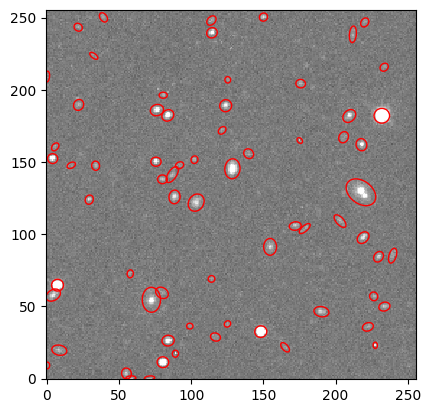

In [15]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)


Now that we are sure the program found the sources correctly, we can use this information to evaluate each one.

In [16]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
